✅ Data loaded successfully.
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column         

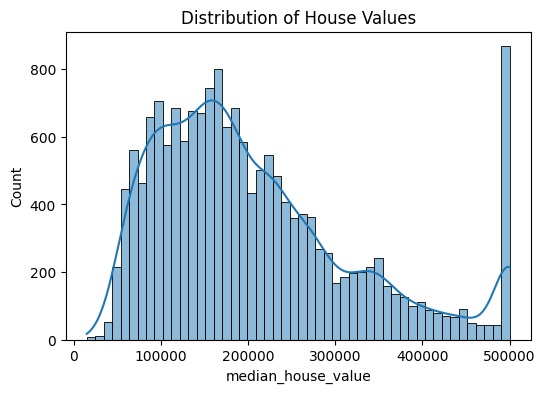

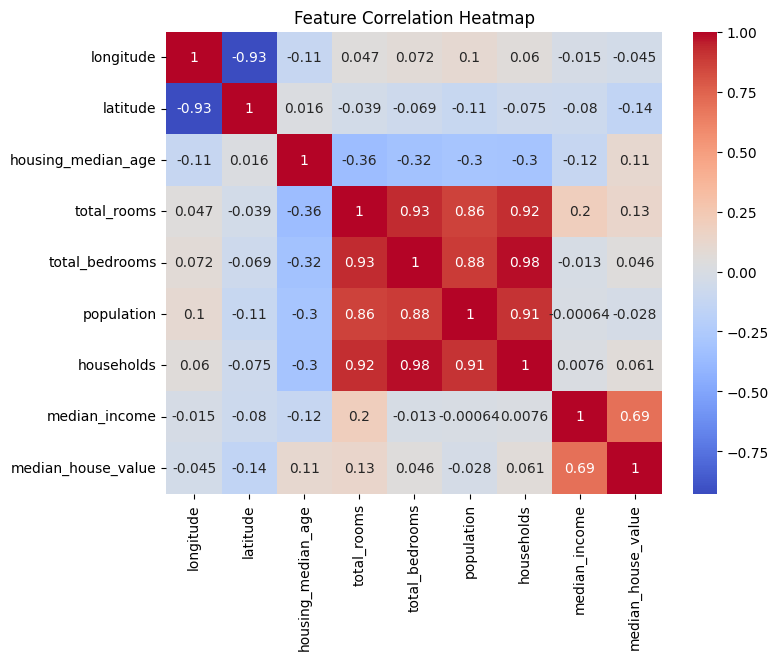


Train shape: (13600, 8), Test shape: (3400, 8)

Model Performance:
RMSE: 68078.33
R²: 0.6636


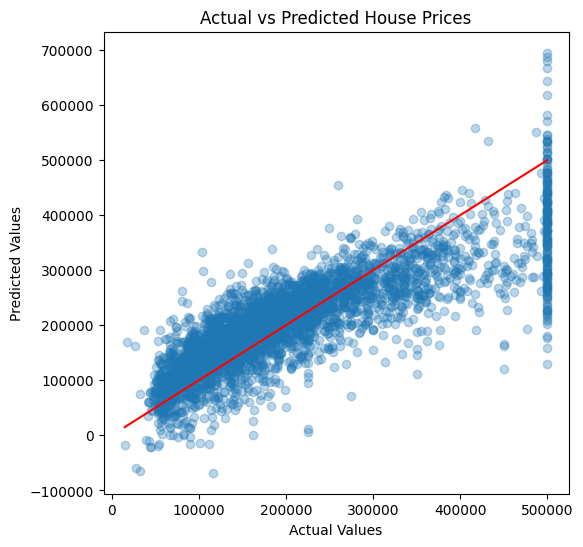

In [ ]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- Load dataset ---
dataframe = pd.read_csv('/content/sample_data/california_housing_train.csv')
print("✅ Data loaded successfully.")
print(dataframe.head())

# --- Quick info ---
print("\nDataset info:")
print(dataframe.info())
print("\nMissing values per column:")
print(dataframe.isnull().sum())

# --- Exploratory Data Analysis (EDA) ---
plt.figure(figsize=(6,4))
sns.histplot(dataframe['median_house_value'], bins=50, kde=True)
plt.title("Distribution of House Values")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(dataframe.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# --- Feature selection ---
X = dataframe.drop("median_house_value", axis=1)
y = dataframe["median_house_value"]

# --- Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTrain shape: {X_train.shape}, Test shape: {X_test.shape}")

# --- Model Training ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Predictions ---
y_pred = model.predict(X_test)

# --- Evaluation ---
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# --- Visualization: Actual vs Predicted ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()


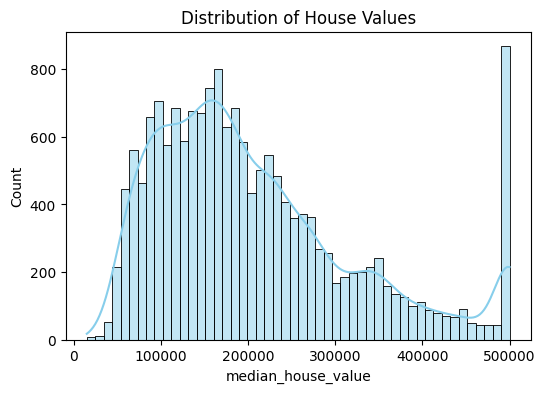

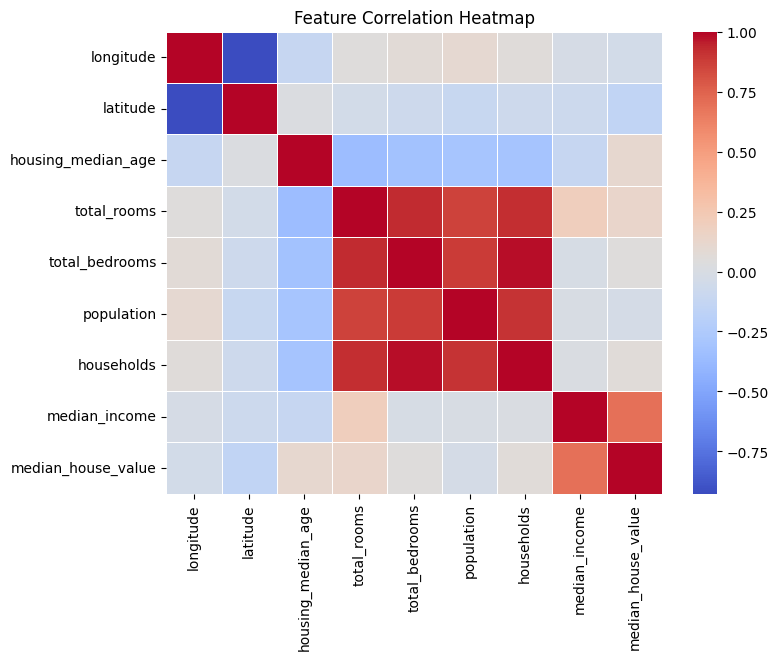

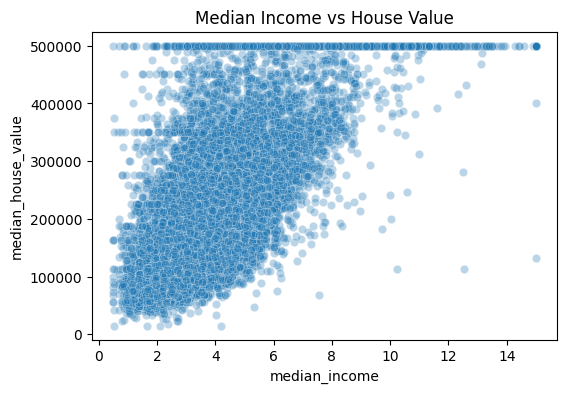

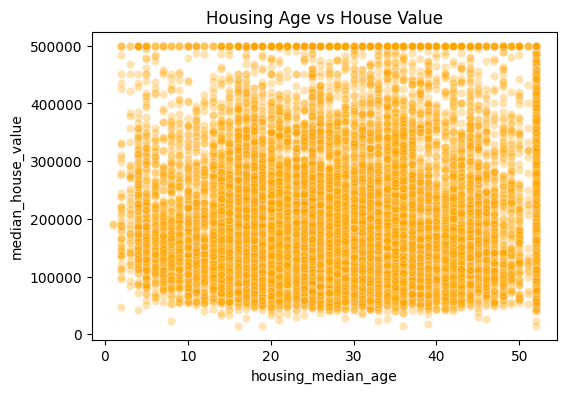

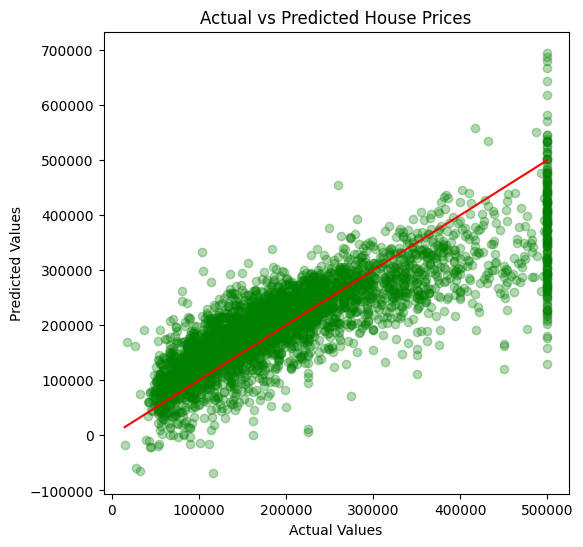

/tmp/ipython-input-2692754394.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="viridis")


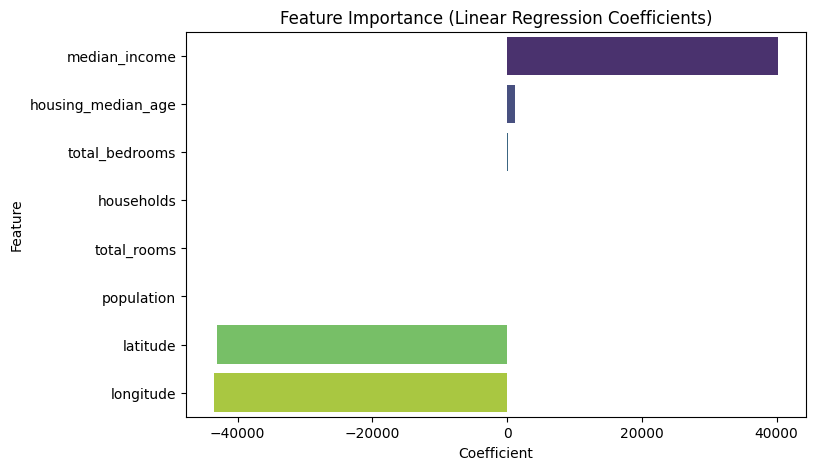

In [ ]:
# --- Extended EDA Visualizations ---

# 1. Distribution of target variable
plt.figure(figsize=(6,4))
sns.histplot(dataframe['median_house_value'], bins=50, kde=True, color="skyblue")
plt.title("Distribution of House Values")
plt.show()

# 2. Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(dataframe.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 3. Median income vs House value (key relationship)
plt.figure(figsize=(6,4))
sns.scatterplot(x="median_income", y="median_house_value", data=dataframe, alpha=0.3)
plt.title("Median Income vs House Value")
plt.show()

# 4. House age vs House value
plt.figure(figsize=(6,4))
sns.scatterplot(x="housing_median_age", y="median_house_value", data=dataframe, alpha=0.3, color="orange")
plt.title("Housing Age vs House Value")
plt.show()

# 5. Actual vs Predicted (after model training)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3, color="green")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

# 6. Feature coefficients (Linear Regression importance)
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Coefficient", y="Feature", data=coef_df, palette="viridis")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()


Training Linear Regression...
Linear Regression: RMSE=68078.33, R²=0.6636
Training Random Forest...
Random Forest: RMSE=49337.40, R²=0.8233
Training XGBoost...
XGBoost: RMSE=47550.38, R²=0.8359

Model Comparison:
                           RMSE        R²
Linear Regression  68078.325525  0.663640
Random Forest      49337.400412  0.823339
XGBoost            47550.375921  0.835905


/tmp/ipython-input-2132126151.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y="RMSE", data=results_df, ax=axes[0], palette="Blues_d")
/tmp/ipython-input-2132126151.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y="R²", data=results_df, ax=axes[1], palette="Greens_d")


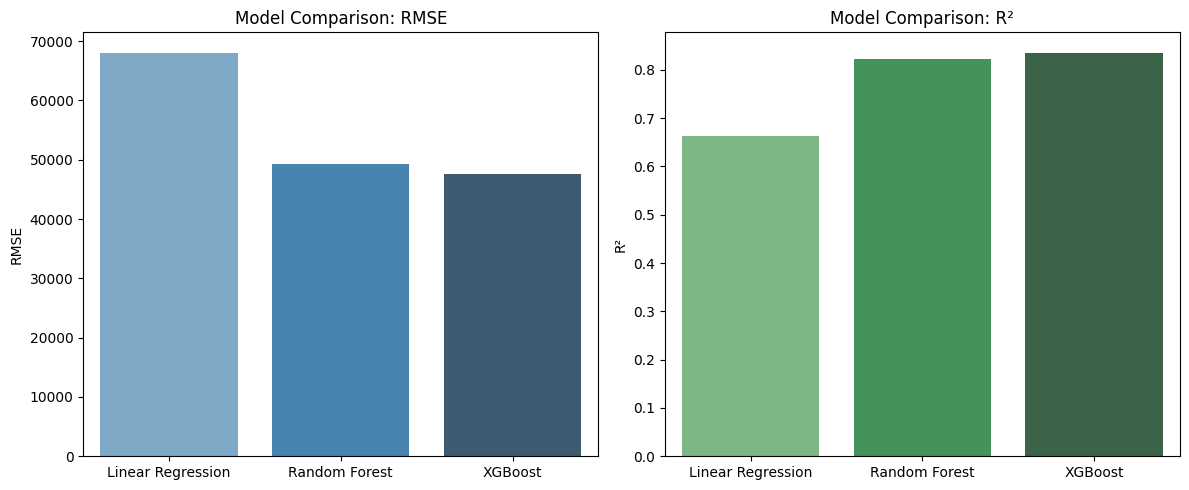

In [ ]:
# --- Additional Models ---
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=300, learning_rate=0.05, random_state=42, verbosity=0)
}

results = {}

# Train & evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results[name] = {"RMSE": rmse, "R²": r2}
    print(f"{name}: RMSE={rmse:.2f}, R²={r2:.4f}")

# Convert results into DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)

# --- Visualization: RMSE and R² side by side ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# RMSE comparison
sns.barplot(x=results_df.index, y="RMSE", data=results_df, ax=axes[0], palette="Blues_d")
axes[0].set_title("Model Comparison: RMSE")
axes[0].set_ylabel("RMSE")
axes[0].set_xlabel("")

# R² comparison
sns.barplot(x=results_df.index, y="R²", data=results_df, ax=axes[1], palette="Greens_d")
axes[1].set_title("Model Comparison: R²")
axes[1].set_ylabel("R²")
axes[1].set_xlabel("")

plt.tight_layout()
plt.show()


/tmp/ipython-input-3940423242.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=rf_importance_df, palette="coolwarm")


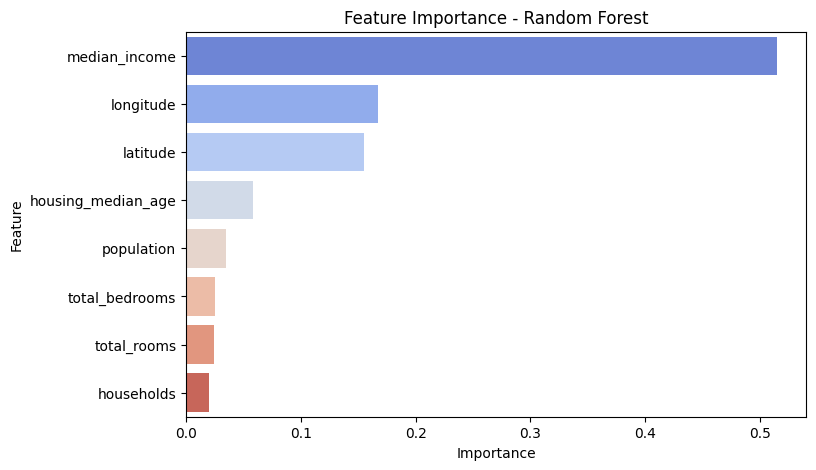

/tmp/ipython-input-3940423242.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=xgb_importance_df, palette="viridis")


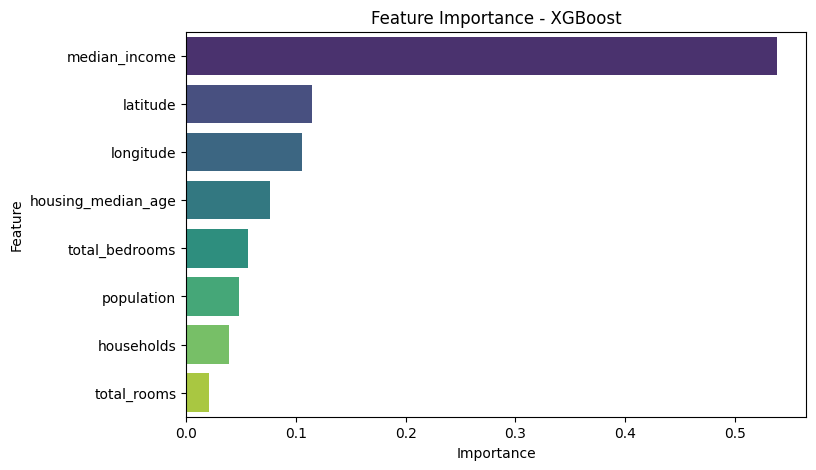

In [ ]:
# --- Feature Importance: Random Forest ---
rf_model = models["Random Forest"]
importances_rf = rf_model.feature_importances_

rf_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances_rf
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=rf_importance_df, palette="coolwarm")
plt.title("Feature Importance - Random Forest")
plt.show()

# --- Feature Importance: XGBoost ---
xgb_model = models["XGBoost"]
importances_xgb = xgb_model.feature_importances_

xgb_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances_xgb
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=xgb_importance_df, palette="viridis")
plt.title("Feature Importance - XGBoost")
plt.show()


/tmp/ipython-input-2602902099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y="RMSE", data=results_df, palette="Blues_d")


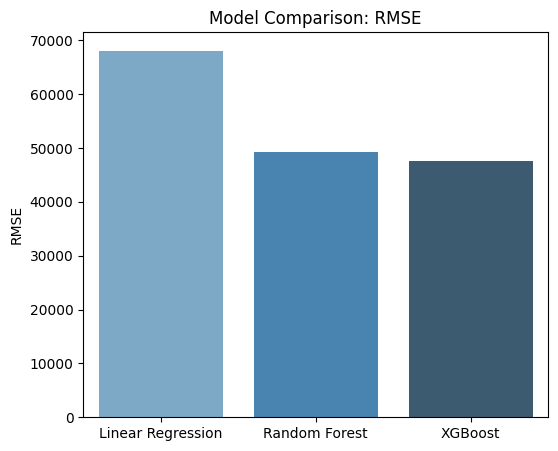

/tmp/ipython-input-2602902099.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y="R²", data=results_df, palette="Greens_d")


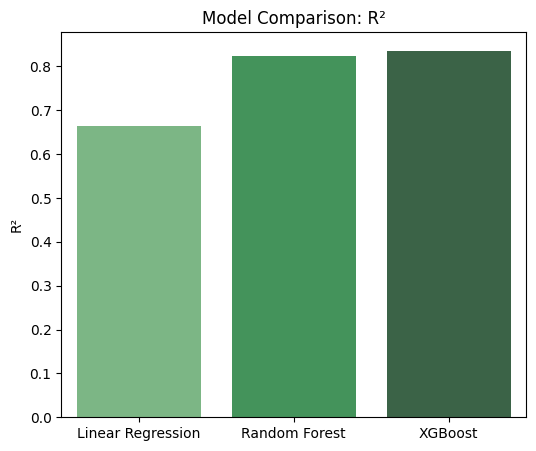

/tmp/ipython-input-2602902099.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=rf_importance_df, palette="coolwarm")


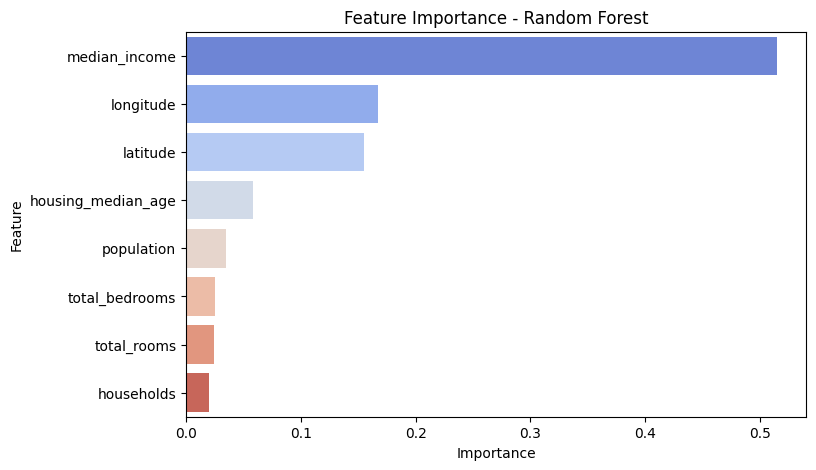

/tmp/ipython-input-2602902099.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=xgb_importance_df, palette="viridis")


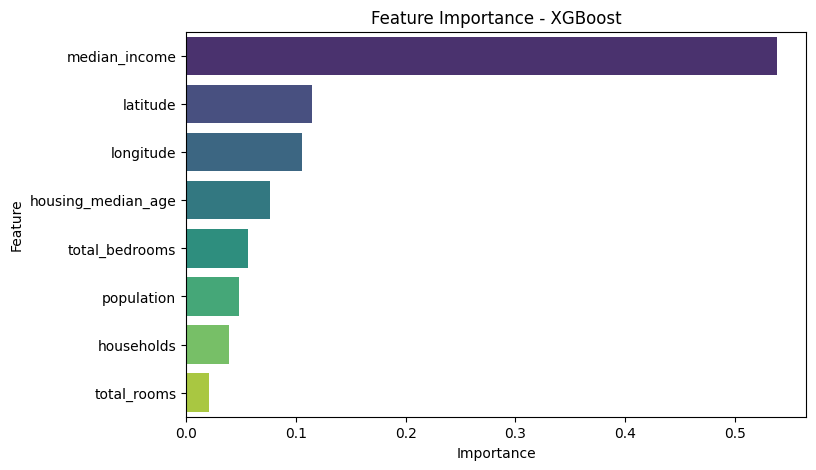

In [ ]:
# --- Model Comparison: RMSE ---
plt.figure(figsize=(6,5))
sns.barplot(x=results_df.index, y="RMSE", data=results_df, palette="Blues_d")
plt.title("Model Comparison: RMSE")
plt.ylabel("RMSE")
plt.xlabel("")
plt.show()

# --- Model Comparison: R² ---
plt.figure(figsize=(6,5))
sns.barplot(x=results_df.index, y="R²", data=results_df, palette="Greens_d")
plt.title("Model Comparison: R²")
plt.ylabel("R²")
plt.xlabel("")
plt.show()

# --- Feature Importance: Random Forest ---
rf_model = models["Random Forest"]
rf_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=rf_importance_df, palette="coolwarm")
plt.title("Feature Importance - Random Forest")
plt.show()

# --- Feature Importance: XGBoost ---
xgb_model = models["XGBoost"]
xgb_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=xgb_importance_df, palette="viridis")
plt.title("Feature Importance - XGBoost")
plt.show()
